In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('framingham.csv')

In [4]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
data.drop(columns=['education'],inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4209 non-null   float64
 4   BPMeds           4185 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4188 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4219 non-null   float64
 12  heartRate        4237 non-null   float64
 13  glucose          3850 non-null   float64
 14  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


In [7]:
data.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [8]:
data['cigsPerDay'].fillna(value=0.0,inplace=True)

In [9]:
numerical_columns=['BPMeds','totChol','BMI','glucose','heartRate']

In [10]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
data[numerical_columns]=imputer.fit_transform(data[numerical_columns])


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4238 non-null   float64
 4   BPMeds           4238 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4238 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4238 non-null   float64
 12  heartRate        4238 non-null   float64
 13  glucose          4238 non-null   float64
 14  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


In [12]:
data['TenYearCHD'].value_counts()/len(data)

TenYearCHD
0    0.848042
1    0.151958
Name: count, dtype: float64

In [13]:
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
X=data.drop(columns=['TenYearCHD'])
Y=data['TenYearCHD']
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

In [16]:
#Splittting the Dataset
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(scaled_X,Y,train_size=0.80,stratify=Y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3390, 14), (848, 14), (3390,), (848,))

In [17]:
from sklearn.tree import DecisionTreeClassifier as DTC

In [18]:
classifier=DTC(class_weight='balanced')
classifier=DTC()

In [19]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [20]:
predicted_values=classifier.predict(x_train)

In [21]:
predicted_values[0:30]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_train,predicted_values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2875
           1       1.00      1.00      1.00       515

    accuracy                           1.00      3390
   macro avg       1.00      1.00      1.00      3390
weighted avg       1.00      1.00      1.00      3390



In [23]:
predicted_values=classifier.predict(x_test)
print(classification_report(y_test,predicted_values))#overfitting

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       719
           1       0.22      0.27      0.24       129

    accuracy                           0.74       848
   macro avg       0.54      0.55      0.54       848
weighted avg       0.77      0.74      0.75       848



In [24]:
! pip install graphviz

In [25]:
from sklearn.tree import export_graphviz
export_graphviz(decision_tree=classifier,out_file='tree.viz',max_depth=None,
                feature_names=X.columns,impurity=False)

In [26]:
#from graphviz import render

#render(filepath='tree.viz', format='png', engine='neato', executable='/path/to/graphviz/bin/')


In [27]:
classifier=DTC()

In [28]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [29]:
classifier.score(x_test,y_test)

0.7476415094339622

In [30]:
classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Max Depth Hyperparameter tuning


In [31]:
from sklearn.metrics import f1_score
def calc_score(model,x1,y1,x2,y2):
  model.fit(x1,y1)

  predict=model.predict(x1)
  f1=f1_score(y1,predict)

  predict=model.predict(x2)
  f2=f1_score(y2,predict)

  return f1,f2

In [32]:
def effect(train_score,test_score,x_axis,title):
  plt.figure(figsize=(5,5),dpi=120)
  plt.plot(x_axis,train_score,color="red",label="train_score")
  plt.plot(x_axis,test_score,color='m',label="test_score")
  plt.title(title)
  plt.legend()
  plt.xlabel('paramaters value')
  plt.ylabel('f1_score')
  plt.show()

In [33]:
maxdepth=[i for i in range(1,50)]
train=[]
test=[]
for i in maxdepth:
  model=DTC(class_weight='balanced',max_depth=i,random_state=42)
  f1,f2=calc_score(model,x_train,y_train,x_test,y_test)
  train.append(f1)
  test.append(f2)

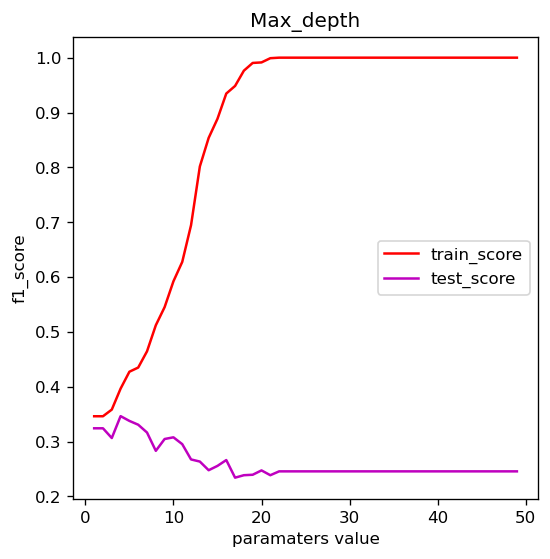

In [34]:
effect(train,test,range(1,50),'Max_depth')

Min Sample Split

In [35]:
min_samples=[i for i in range(2,5000,25)]
train=[]
test=[]
for i in  min_samples:
    model=DTC(class_weight='balanced',min_samples_split=i,random_state=42)
    f1,f2=calc_score(model,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)
    

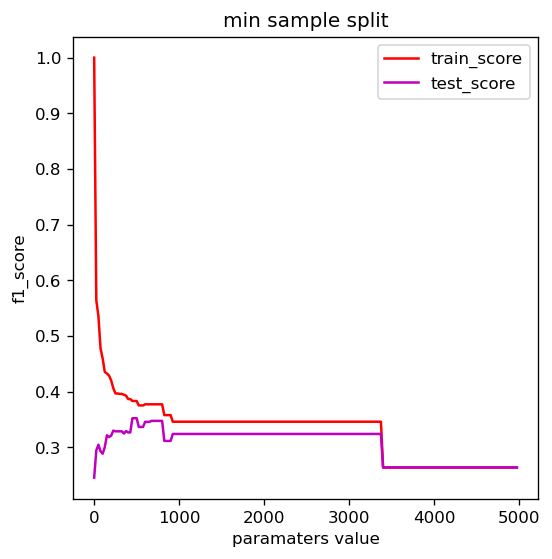

In [36]:
effect(train,test,range(2,5000,25),'min sample split')

max leaf node

In [37]:
maxleafnodes=[i for i in range(2,200,10)]
train=[]
test=[]
for i in maxleafnodes:
    model=DTC(class_weight='balanced',max_leaf_nodes=i,random_state=42)
    f1,f2=calc_score(model,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)

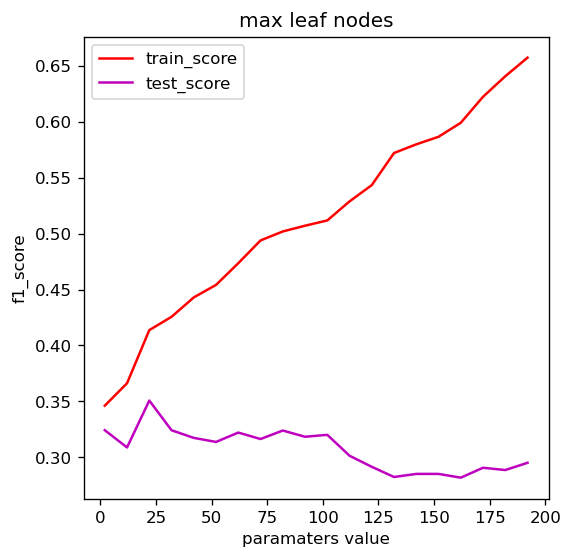

In [38]:
effect(train,test,range(2,200,10),"max leaf nodes")

In [39]:
min_sampleleafs=[i for i in range(2,4000,25)]
train=[]
test=[]
for i in min_sampleleafs:
  model=DTC(class_weight='balanced',min_samples_leaf=i,random_state=42)
  f1,f2=calc_score(model,x_train,y_train,x_test,y_test)
  train.append(f1)
  test.append(f2)

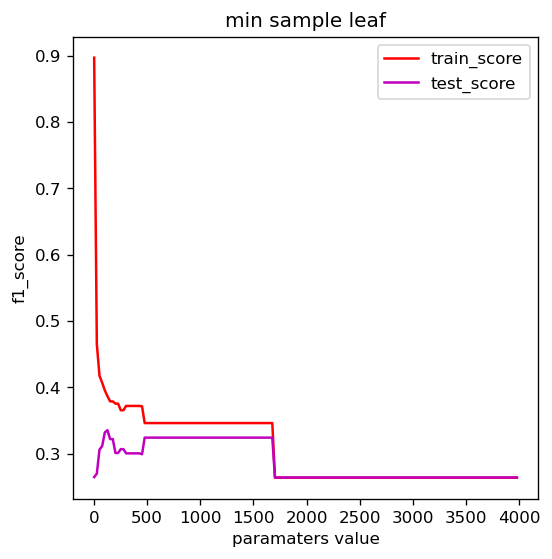

In [40]:
effect(train,test,range(2,4000,25),"min sample leaf")

In [41]:
model=DTC(max_depth=9)
model.fit(x_train,y_train)
feature_imp=pd.Series(model.feature_importances_,index=X.columns)
k=feature_imp.sort_values()

Text(0.5, 1.0, 'feature importance')

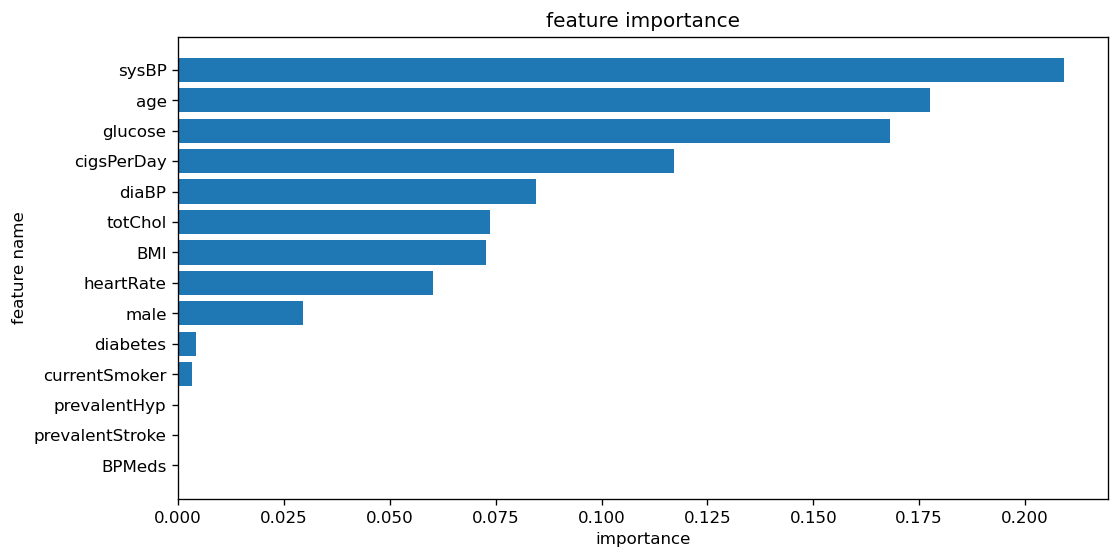

In [42]:
plt.figure(figsize=(10,5),dpi=120)
plt.barh(k.index,k)
plt.xlabel('importance')
plt.ylabel('feature name')
plt.title('feature importance')

In [43]:
model=DTC(max_depth=9,min_samples_leaf=50,max_leaf_nodes=25,min_samples_split=600)

In [44]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=9, max_leaf_nodes=25, min_samples_leaf=50,
                       min_samples_split=600)

In [45]:
predicted_values=model.predict(x_test)

In [49]:
model.score(x_test,y_test)

0.847877358490566

In [47]:
feature_imp=pd.Series(model.feature_importances_,index=X.columns)
k=feature_imp.sort_values()

Text(0.5, 1.0, 'feature importance')

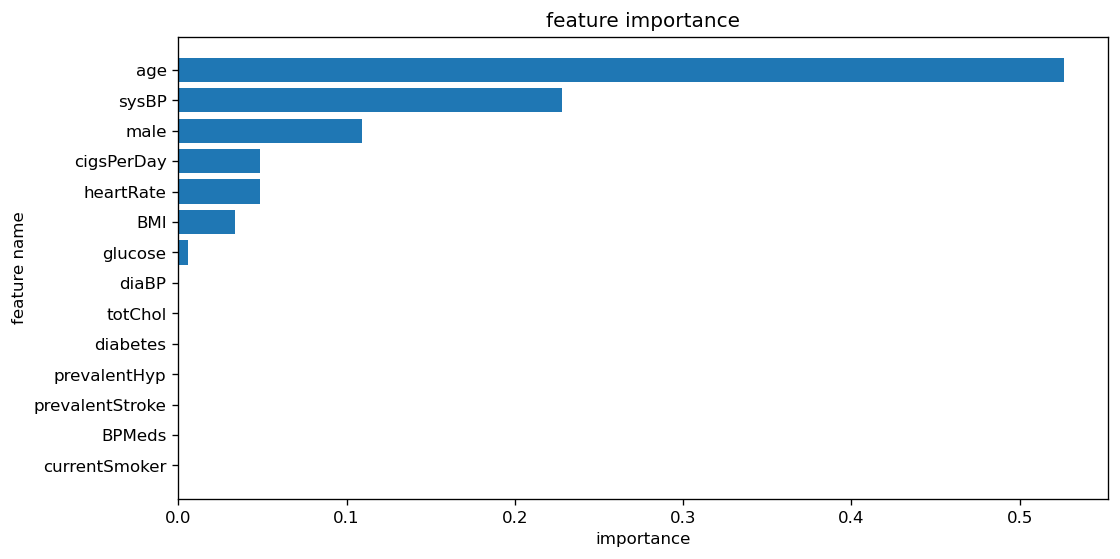

In [48]:
plt.figure(figsize=(10,5),dpi=120)
plt.barh(k.index,k)
plt.xlabel('importance')
plt.ylabel('feature name')
plt.title('feature importance')